In [1]:
from tensorflow import keras

In [35]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [36]:
# 6만장의 사진
# 28 by 28
train_input.shape

(60000, 28, 28)

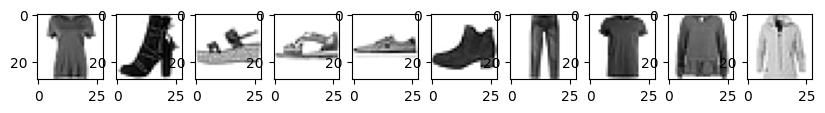

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i+10], cmap='gray_r')

plt.show()

In [38]:
train_target[0:10]
# 숫자는 의류의 레이블
# 0=티셔츠, 1=바지, 2=스웨터, 3=드레스

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [39]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [40]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) # 사진 데이터를 1행으로 만들기

In [41]:
train_scaled.shape

(60000, 784)

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

In [52]:
# 확률적 경사하강
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
scores

{'fit_time': array([4.24611497, 4.17476034, 4.52381921, 4.38591528, 4.42127728]),
 'score_time': array([0.02093244, 0.01969147, 0.01694393, 0.0246613 , 0.02385664]),
 'test_score': array([0.7809375 , 0.76229167, 0.79677083, 0.77791667, 0.79072917])}

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [46]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))
# activation='' 활성함수

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model = keras.Sequential([dense])
# .Sequential() 여러개의 층을 받기위함

In [48]:
# 연결선의 가중치 찾아야함
# 모델 학습시키기 전에
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7336 - loss: 0.7809
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8350 - loss: 0.4808
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8465 - loss: 0.4538
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8505 - loss: 0.4367
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8565 - loss: 0.4278


In [51]:
model.evaluate(val_scaled, val_target)
# 6만개 중 20% 땐거에서 실행한거

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.8504 - loss: 0.4286


[0.43399396538734436, 0.8515833616256714]